In [1]:
import pandas as pd
data = pd.read_csv('./training_data_fall2024.csv')
data = pd.get_dummies(data, columns=["hour_of_day", "day_of_week", "month"])
data['increase_stock'] = data['increase_stock'] == 'low_bike_demand'

ModuleNotFoundError: No module named 'pandas'

In [3]:
# data = data[['increase_stock', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']]
data['temp_cold'] = data['temp'] < 5
data['dew_low'] = data['dew'] < -10
data['precip_0'] = data['precip'] == 0
data['snowdepth_0'] = data['snowdepth'] == 0

data = data.astype(float)

<Axes: >

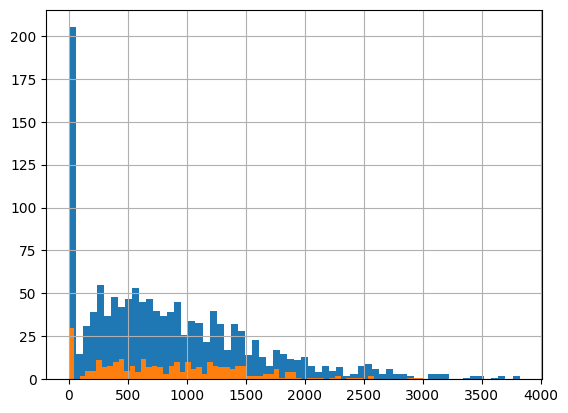

In [3]:
anadata = data[['increase_stock', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']].astype(float)
name = 'temp'
anadata[name] = anadata['windspeed'] * anadata['cloudcover']
anadata[anadata['increase_stock'] == 1.0][name].hist(bins=64)
anadata[anadata['increase_stock'] == 0.0][name].hist(bins=64)

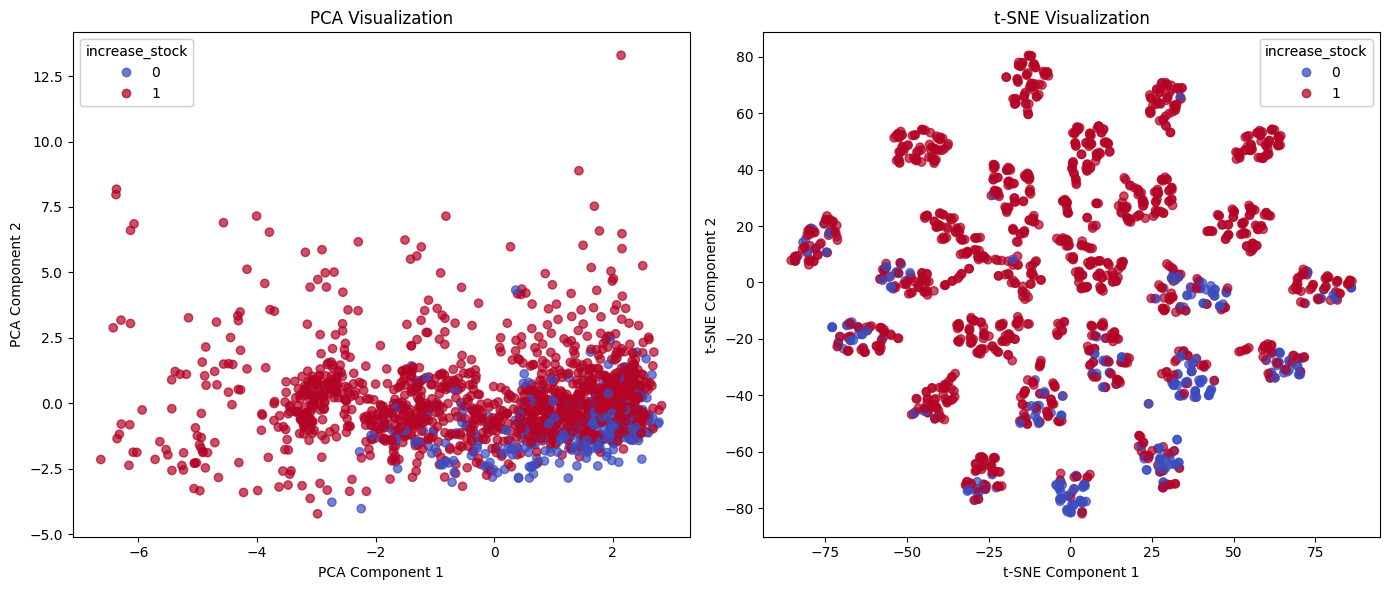

In [83]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def visualize_tsne_pca(dataframe, label_column='increase_stock'):
    """
    Visualize a DataFrame using both t-SNE and PCA, with coloring based on labels.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to visualize.
        label_column (str): The label column to use for coloring (binary: True/False).

    Returns:
        None (plots the PCA and t-SNE visualizations).
    """
    # Separate features and labels
    data = dataframe.drop(columns=[label_column], errors='ignore')
    labels = dataframe[label_column].astype(int)  # Convert labels to integers for plotting

    # Ensure all features are numeric
    data = data.select_dtypes(include=[np.number])

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)

    # PCA Visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(normalized_data)

    # t-SNE Visualization
    tsne = TSNE(n_components=2, perplexity=10, random_state=42)
    tsne_result = tsne.fit_transform(normalized_data)

    # Create subplots for both visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # PCA plot
    scatter1 = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[0].set_title('PCA Visualization')
    axes[0].set_xlabel('PCA Component 1')
    axes[0].set_ylabel('PCA Component 2')
    legend1 = axes[0].legend(*scatter1.legend_elements(), title=label_column)
    axes[0].add_artist(legend1)

    # t-SNE plot
    scatter2 = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[1].set_title('t-SNE Visualization')
    axes[1].set_xlabel('t-SNE Component 1')
    axes[1].set_ylabel('t-SNE Component 2')
    legend2 = axes[1].legend(*scatter2.legend_elements(), title=label_column)
    axes[1].add_artist(legend2)

    plt.tight_layout()
    plt.show()


visualize_tsne_pca(data)

In [ ]:
from data import BikeDemandDataset

data = BikeDemandDataset('training_data_fall2024.csv', data_type='train')

In [4]:
for i in data:
    inputs = i[0]
    output = i[1]

    print('input:', inputs)
    print(output)
    break

input: tensor([ 16.0000,   5.0000,   1.0000,   0.0000,   0.0000,   0.0000,   1.6000,
        -13.9000,  30.5800,   0.0000,   0.0000,   0.0000,  24.2000,  25.3000,
         16.0000])
tensor(0)


### Laheeq Code Analysis


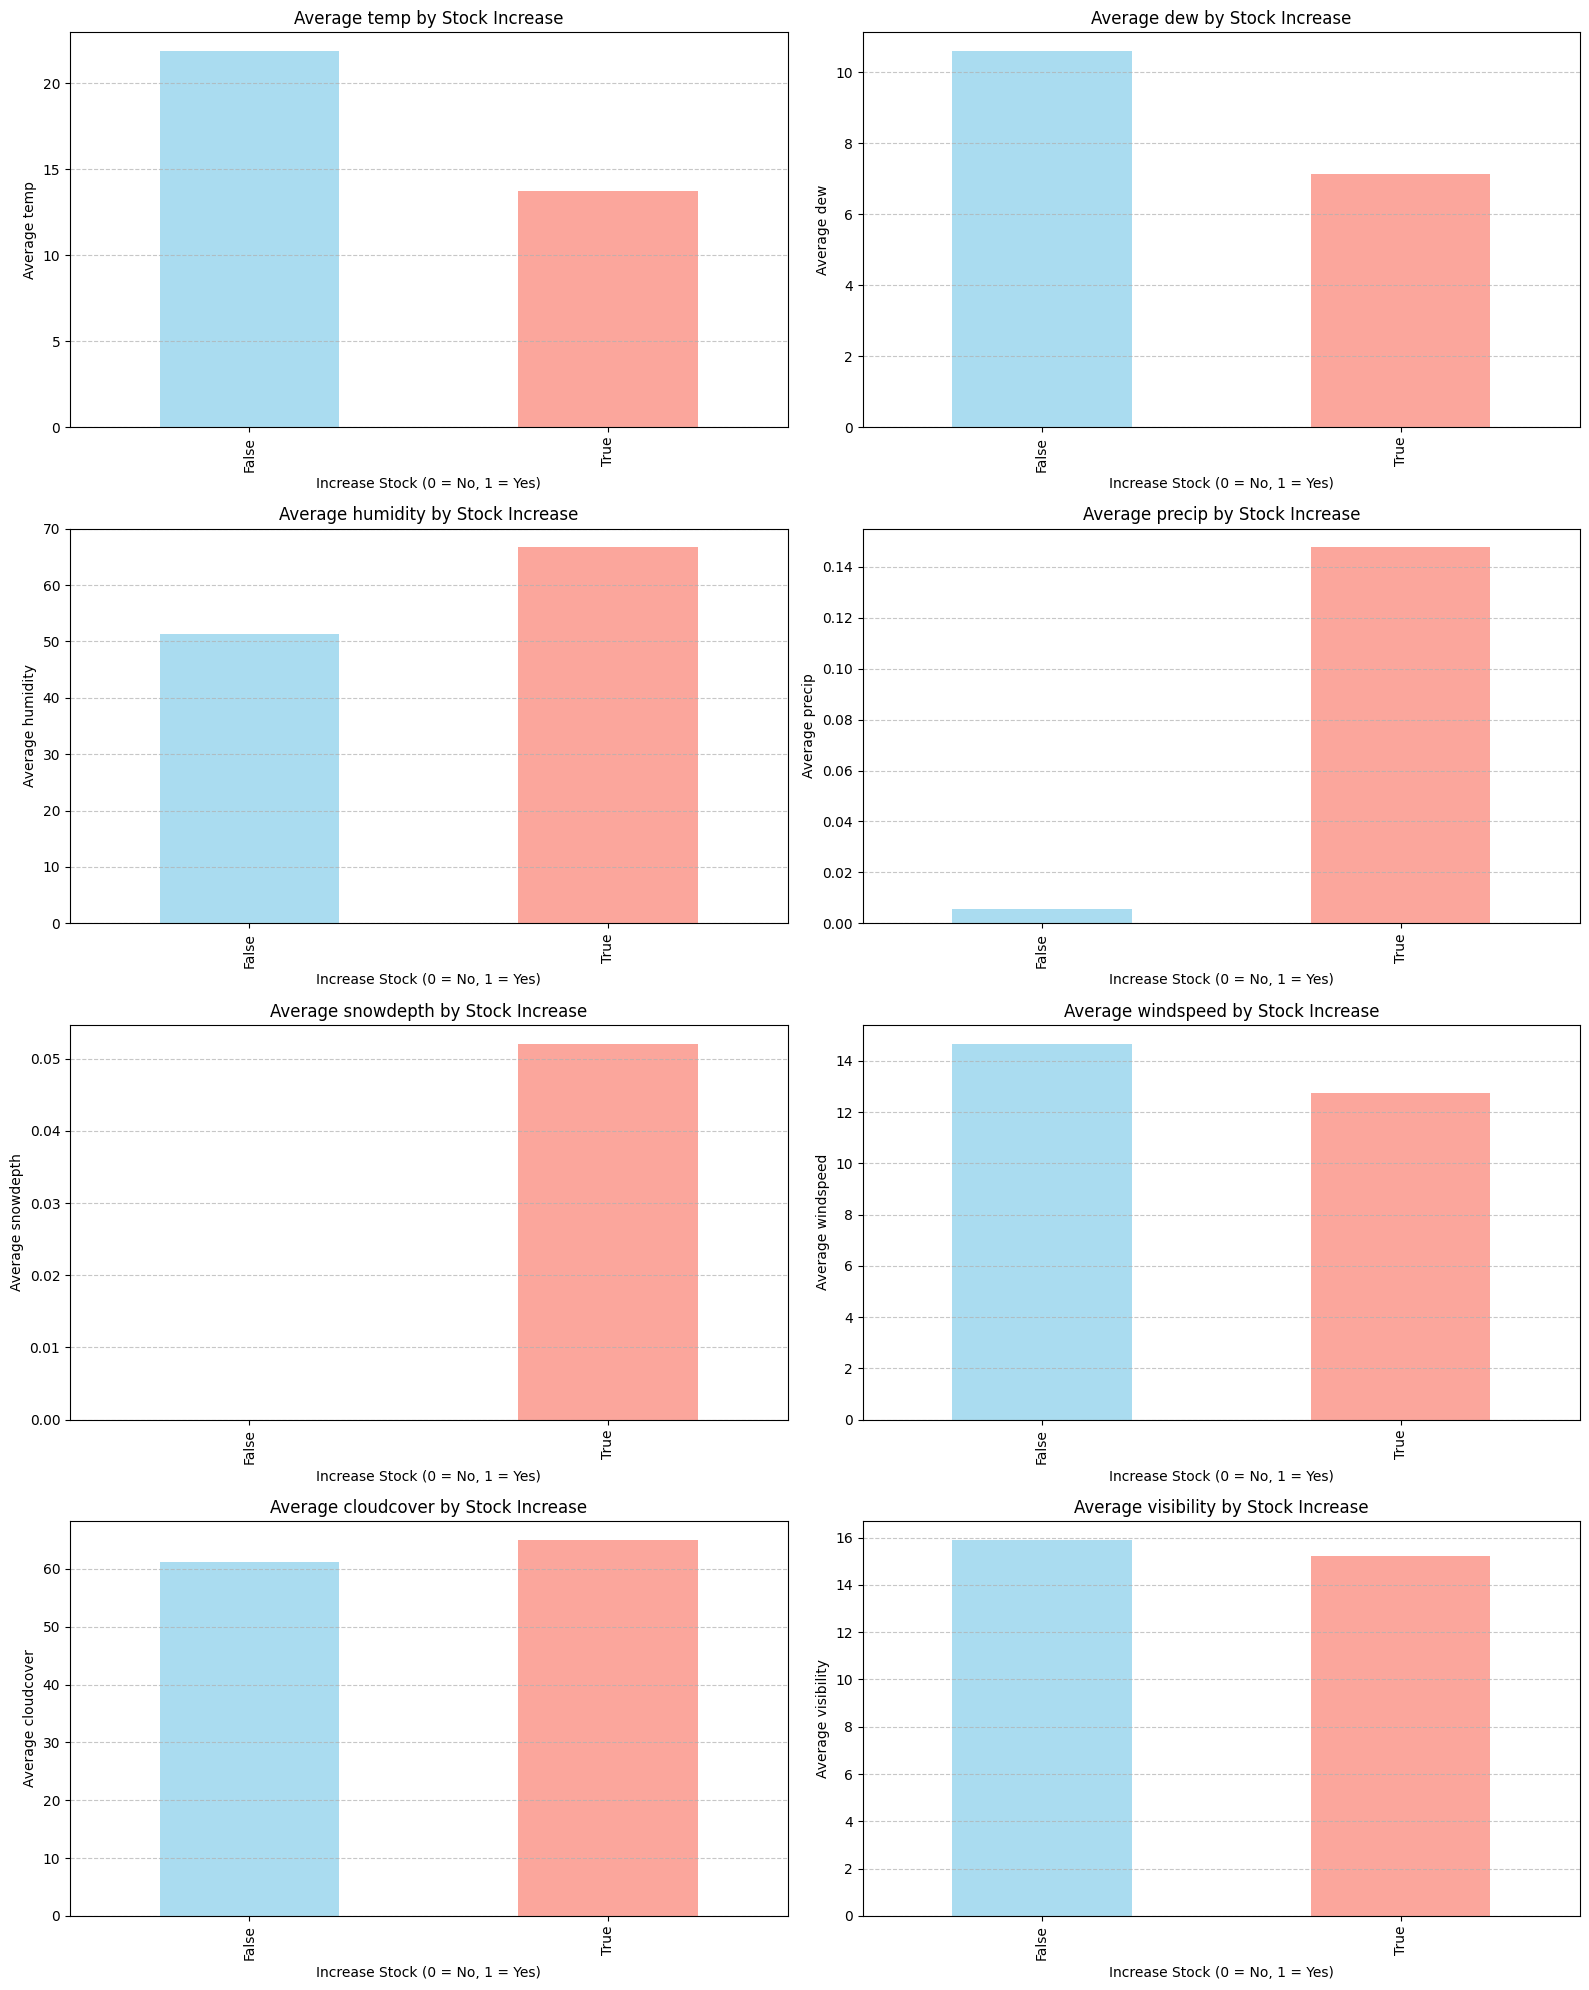

In [25]:
import matplotlib.pyplot as plt

# List of features to analyze
features = ['temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

# Group data by `increase_stock` and calculate the mean
grouped_data = data1.groupby('increase_stock')[features].mean()

# Create a bar graph for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    grouped_data[feature].plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'], alpha=0.7)
    axes[i].set_title(f"Average {feature} by Stock Increase")
    axes[i].set_xlabel("Increase Stock (0 = No, 1 = Yes)")
    axes[i].set_ylabel(f"Average {feature}")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Fresh Data Import for Testing 

In [36]:
import pandas as pd
data1 = pd.read_csv(r"D:\Uppsala Stuff\P2\SML\Project\UU-SML-Project\training_data_fall2024.csv")
# data1 = pd.get_dummies(data1, columns=["hour_of_day", "day_of_week", "month"]) 
data1['increase_stock'] = data1['increase_stock'] == 'low_bike_demand'
data1.drop(columns="snow")
print(data1.head, data1.columns)


<bound method NDFrame.head of       hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth

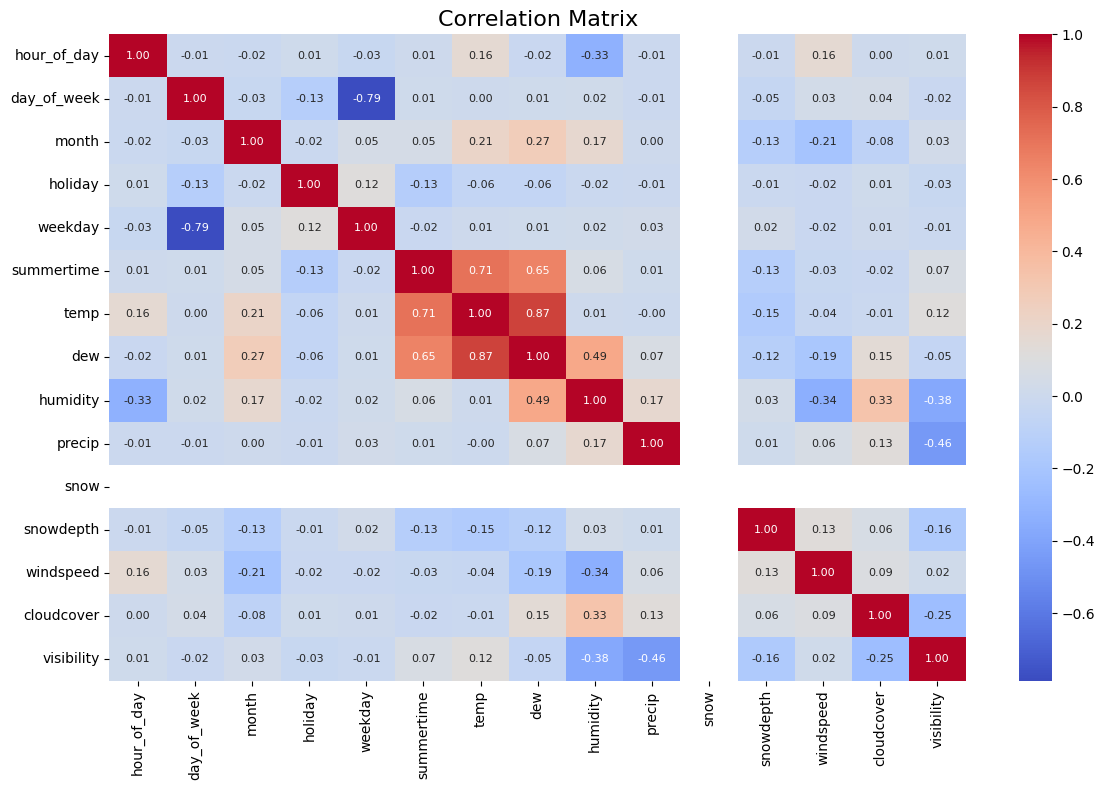

KeyError: 'increase_stock'

In [39]:
## Correlation Graph

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(dataframe, label_column='increase_stock'):
    """
    Plot the correlation matrix for a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to analyze.
        label_column (str): The target column for correlation analysis.

    Returns:
        None (displays the correlation heatmap).
    """
    # Select numeric features only
    numeric_data = dataframe.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
    plt.title("Correlation Matrix", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Highlight correlation with the target label column
    print(f"Correlation with '{label_column}':\n{corr_matrix[label_column].sort_values(ascending=False)}")

# Call the function with your dataset
plot_correlation_matrix(data1, label_column='increase_stock')
